## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load the Dataset

In [2]:
df = pd.read_excel(r"C:\Users\Shweta\Desktop\Python\Ecommerce_Dataset.xlsx")

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 5630
Number of Columns 20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


## Number of Customers in Churn

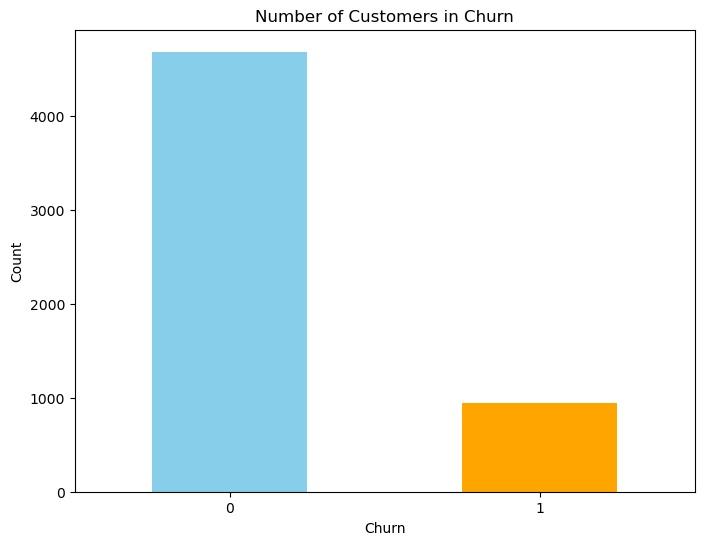

In [8]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Customers in Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

The number of retained cutomers is more than churned customers.

## Distribution Plots

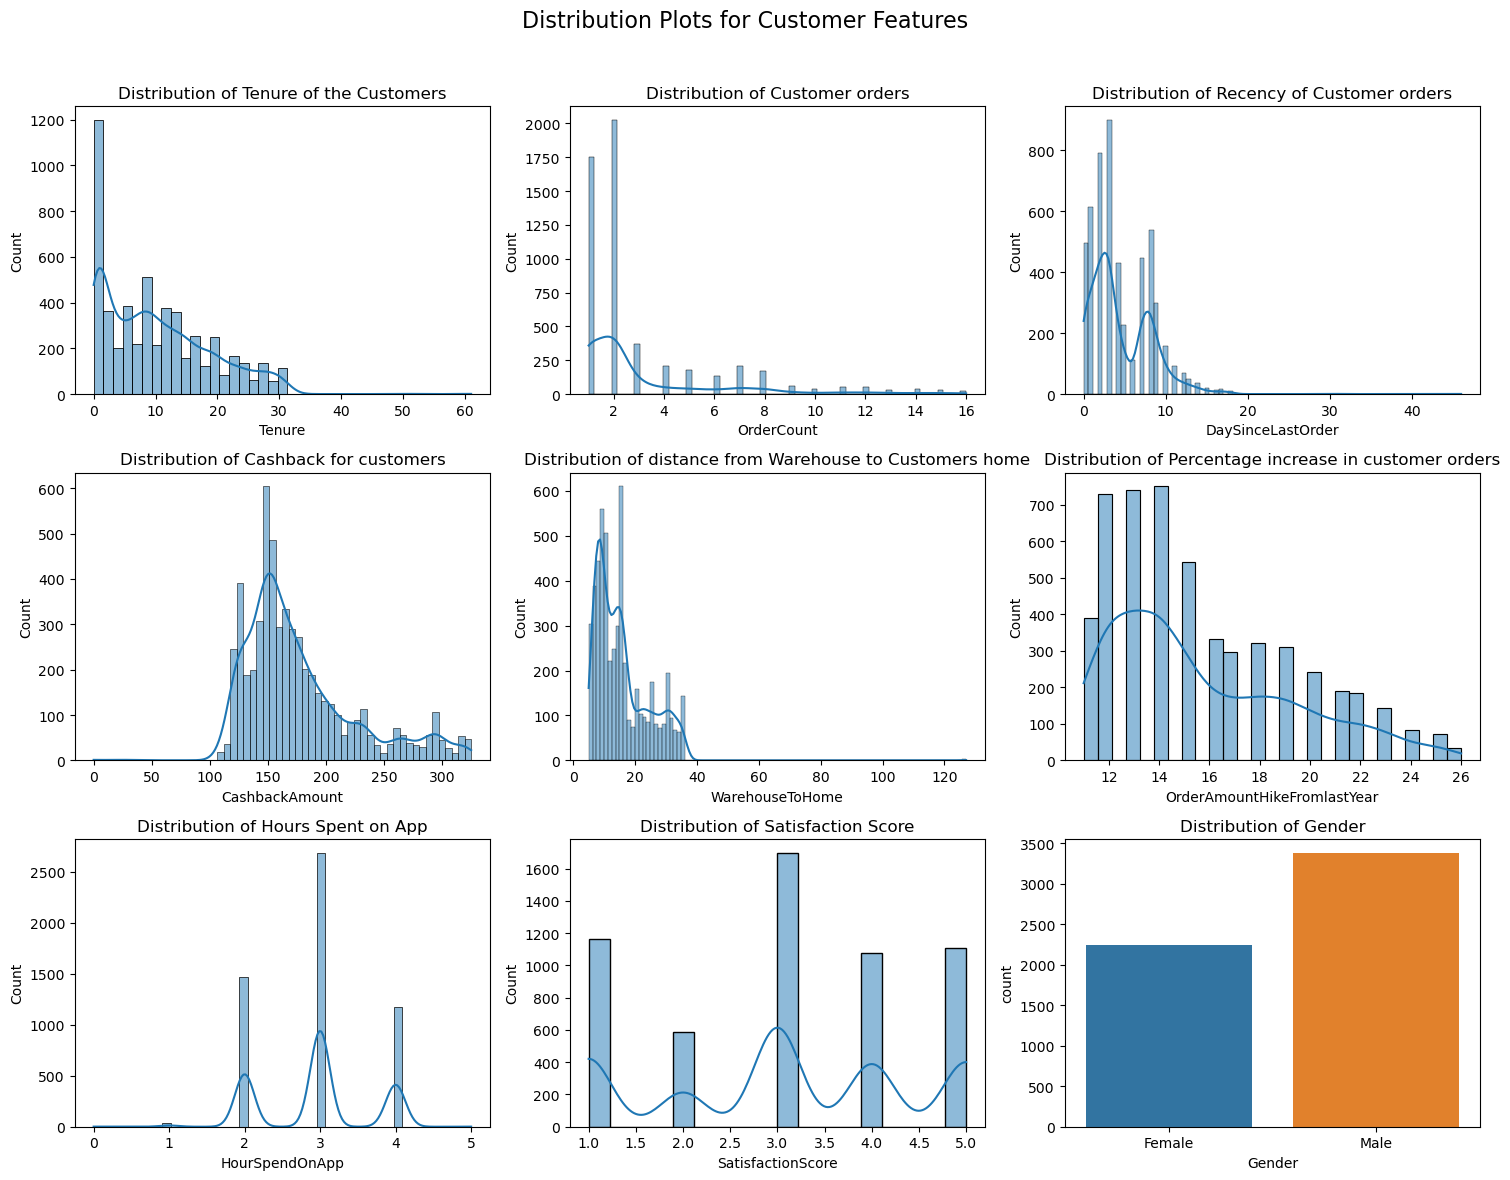

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution Plots for Customer Features', fontsize=16)

# Plot 1
sns.histplot(x='Tenure', kde=True, data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Tenure of the Customers')

# Plot 2
sns.histplot(x='OrderCount', kde=True, data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Customer orders')

# Plot 3
sns.histplot(x='DaySinceLastOrder', kde=True, data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Recency of Customer orders')

# Plot 4
sns.histplot(x='CashbackAmount', kde=True, data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Cashback for customers')

# Plot 5
sns.histplot(x='WarehouseToHome', kde=True, data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of distance from Warehouse to Customers home')

# Plot 6
sns.histplot(x='OrderAmountHikeFromlastYear', kde=True, data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Percentage increase in customer orders')

# Plot 7
sns.histplot(x='HourSpendOnApp', kde=True, data=df, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Hours Spent on App')

# Plot 8
sns.histplot(x='SatisfactionScore', kde=True, data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Satisfaction Score')

# Plot 9
sns.countplot(x='Gender', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Distribution of Gender')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Analysis of Hours spent on App

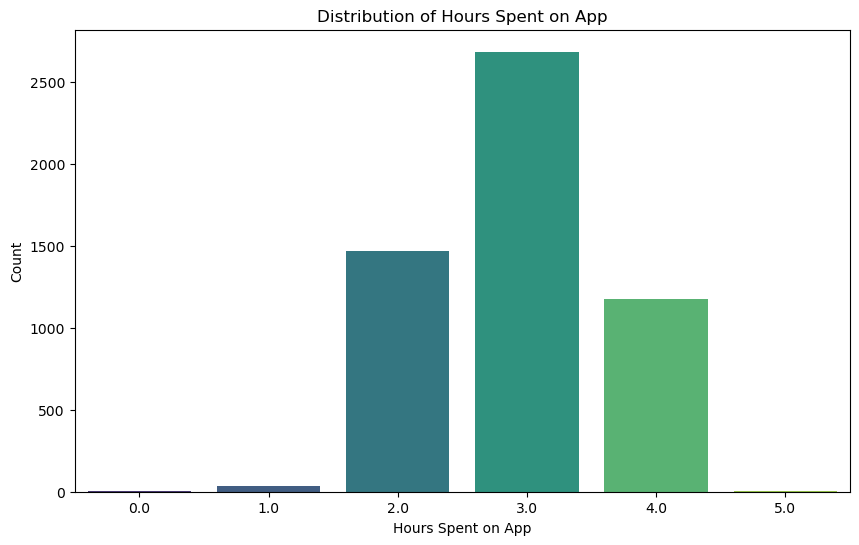

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HourSpendOnApp', data=df, palette='viridis')
plt.title('Distribution of Hours Spent on App')
plt.xlabel('Hours Spent on App')
plt.ylabel('Count')
plt.show()

## Distribution of Gender, Complain and Preferred Login Device for Retained and Churned Customers

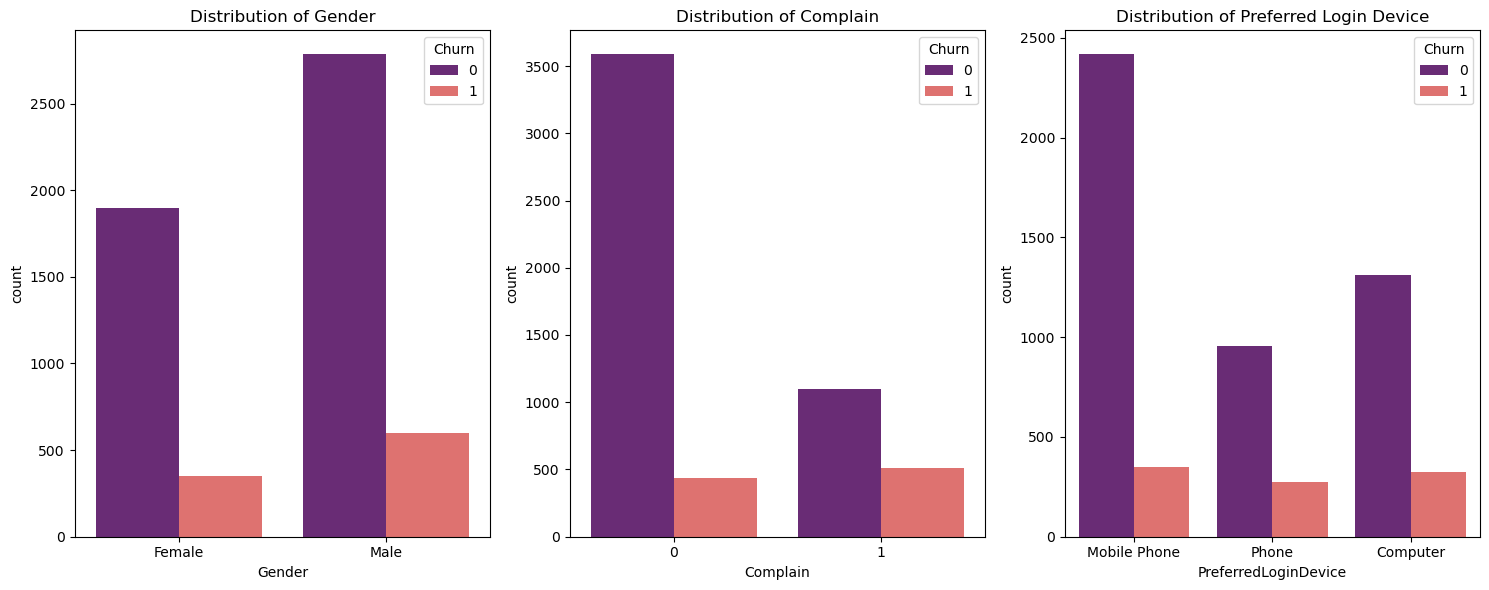

In [11]:
plt.figure(figsize=(15, 6))

# Plot 1
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Churn', palette='magma', data=df)
plt.title("Distribution of Gender")

# Plot 2
plt.subplot(1, 3, 2)
sns.countplot(x='Complain', hue='Churn', palette='magma', data=df)
plt.title("Distribution of Complain")

# Plot 3
plt.subplot(1, 3, 3)  
sns.countplot(x='PreferredLoginDevice', hue='Churn', palette='magma', data=df)
plt.title("Distribution of Preferred Login Device")

plt.tight_layout()
plt.show()

## Distribution of Order count basis City Tier

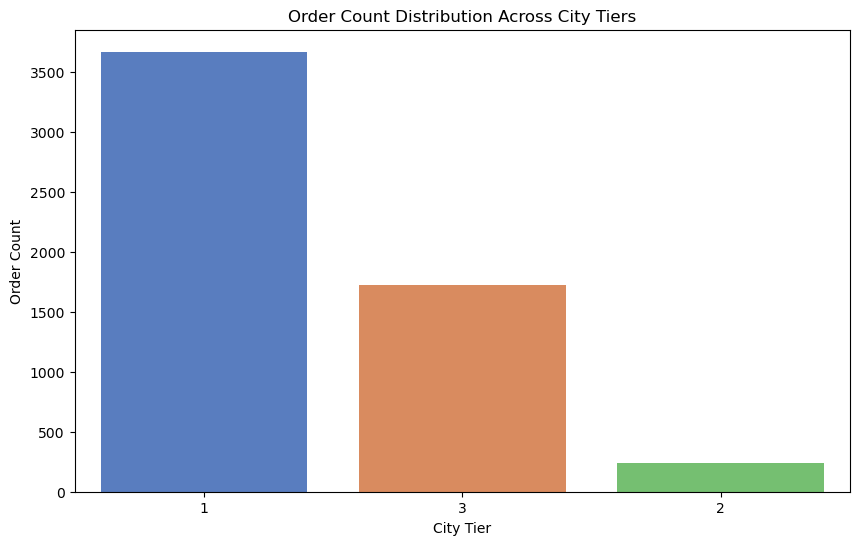

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CityTier', data=df, palette='muted', order=df['CityTier'].value_counts().index)
plt.title('Order Count Distribution Across City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Order Count')
plt.show()

### Insights from the Analysis:

1) Outliers in Key Features:
The features such as Tenure, Days since the last order, Cashback Amount, and Warehouse to Home distance exhibit outliers.

2) App Usage Patterns:
The majority of customers spend approximately 3 hours on the app. Notably, a significant portion falls within the range of 2 to 4 hours, indicating a concentration of user engagement in this time frame.

3) Impact of Customer Complaints on Churn:
Customers who have lodged complaints appear to have a higher churn rate compared to those without complaints. This highlights the importance of addressing customer concerns to mitigate churn risk.

4) Satisfaction Score vs. Churn:
Higher satisfaction scores strongly associate with lower churn, confirming our expectation. This suggests that customer satisfaction is a critical driver in retaining customers.

5) Complaints and Churn:
The analysis indicates that more complaints are associated with higher churn. Customer complaints have a negative impact on satisfaction, which can, in turn, contribute to higher churn rates.